<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/Discretisation/DecsionTreeDiscretisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/content/drive/MyDrive/Udemy Courses - 2.0/Feature Engineering/Dataset/titanic.csv'
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
use_cols=['Cabin','Pclass','Age','Fare','Survived']

In [5]:
data = data[use_cols]

In [6]:
data['Cabin'] = data['Cabin'].str[0]

In [7]:
data.isnull().sum()

Cabin       687
Pclass        0
Age         177
Fare          0
Survived      0
dtype: int64

In [8]:
for col in data.columns:
  data[col].fillna(data[col].mode()[0], inplace = True)

In [9]:
data.isnull().sum()

Cabin       0
Pclass      0
Age         0
Fare        0
Survived    0
dtype: int64

In [10]:
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 100, stratify = y)

In [13]:
bins = 8

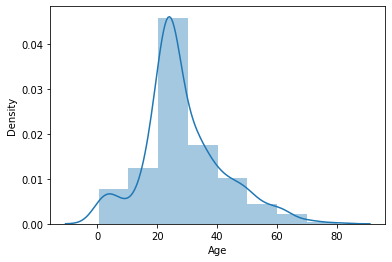

In [14]:
sns.distplot(X_train['Age'], bins = bins)
plt.show()

Decison Tree Discretisation

In [15]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 4.9 MB/s 


In [16]:
from feature_engine.discretisation import DecisionTreeDiscretiser

In [27]:
disc = DecisionTreeDiscretiser(variables = ['Age','Fare'],cv = 10,regression= False,scoring = 'roc_auc',
                               param_grid = {'max_depth' : [2,3,4,5],
                                             'min_samples_leaf':[4,5,10]})

In [28]:
disc.fit(X_train,y_train)

DecisionTreeDiscretiser(cv=10,
                        param_grid={'max_depth': [2, 3, 4, 5],
                                    'min_samples_leaf': [4, 5, 10]},
                        regression=False, scoring='roc_auc',
                        variables=['Age', 'Fare'])

In [31]:
disc.binner_dict_['Age'].best_params_

{'max_depth': 5, 'min_samples_leaf': 5}

In [32]:
disc.binner_dict_['Fare'].best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

In [33]:
disc.binner_dict_['Age'].best_score_

0.5405637578477969

In [34]:
disc.binner_dict_['Fare'].best_score_

0.6783529772731718

In [37]:
X_train = disc.transform(X_train)

In [38]:
X_test = disc.transform(X_test)

In [49]:
X_train['Fare'].unique()

array([0.03571429, 0.37209302, 0.54639175, 0.33823529, 0.24742268,
       0.23529412, 0.14285714, 0.75      , 0.1       , 0.        ,
       0.76923077, 0.9375    , 0.72727273, 0.09090909, 0.22580645,
       0.36111111, 0.63157895, 0.625     , 0.7       ])

In [48]:
X_train['Fare'].nunique()

19

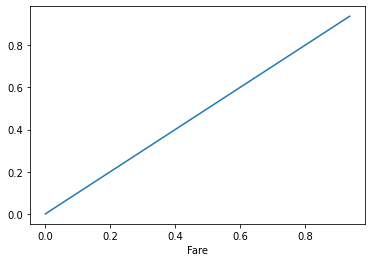

In [46]:
pd.concat([X_train,y_train], axis = 1).groupby('Fare')['Survived'].mean().plot()
plt.show()

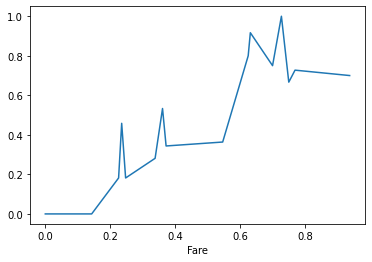

In [47]:
pd.concat([X_test,y_test], axis = 1).groupby('Fare')['Survived'].mean().plot()
plt.show()